In [2]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# Download dan ekstrak dataset rockpaperscissors
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [4]:
!dir rockpaperscissors

paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [5]:
# Direktori dataset
base_dir = 'rockpaperscissors/rps-cv-images'

# Membuat objek ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)

# Mempersiapkan data pelatihan
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Mempersiapkan data validasi
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    tf.keras.layers.Dense(3, activation='softmax')  # Sesuaikan jumlah kelas
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)       0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
20/20 - 106s - loss: 1.2214 - accuracy: 0.4688 - val_loss: 0.7056 - val_accuracy: 0.7500 - 106s/epoch - 5s/step
Epoch 2/20
20/20 - 96s - loss: 0.5716 - accuracy: 0.7787 - val_loss: 0.3958 - val_accuracy: 0.8625 - 96s/epoch - 5s/step
Epoch 3/20
20/20 - 96s - loss: 0.4711 - accuracy: 0.8393 - val_loss: 0.3631 - val_accuracy: 0.8625 - 96s/epoch - 5s/step
Epoch 4/20
20/20 - 109s - loss: 0.2803 - accuracy: 0.8984 - val_loss: 0.2295 - val_accuracy: 0.9250 - 109s/epoch - 5s/step
Epoch 5/20
20/20 - 99s - loss: 0.2668 - accuracy: 0.8967 - val_loss: 0.1712 - val_accuracy: 0.9250 - 99s/epoch - 5s/step
Epoch 6/20
20/20 - 97s - loss: 0.1292 - accuracy: 0.9469 - val_loss: 0.1365 - val_accuracy: 0.9688 - 97s/epoch - 5s/step
Epoch 7/20
20/20 - 103s - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.1193 - val_accuracy: 0.9688 - 103s/epoch - 5s/step
Epoch 8/20
20/20 - 108s - loss: 0.1175 - accuracy: 0.9590 - val_loss: 0.1686 - val_accuracy: 0.9438 - 108s/epoch - 5s/step
Epoch 9/20
20/20 - 97s -

1/1 [==============================] - 1s 558ms/step
/content/TEST BATU.jpg
batu


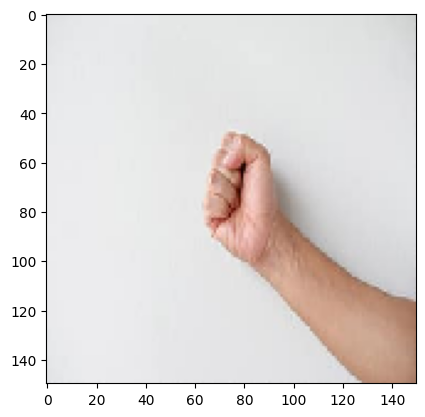

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lokasi file gambar
file_path = '/content/TEST BATU.jpg'

# Memprediksi gambar
img = image.load_img(file_path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

# Menampilkan hasil prediksi
print(file_path)
if np.argmax(classes)==0:
   print('gunting')
elif np.argmax(classes)==1:
   print('batu')
else:
   print('kertas')


1/1 [==============================] - 0s 71ms/step
/content/TEST GUNTING.jpg
gunting


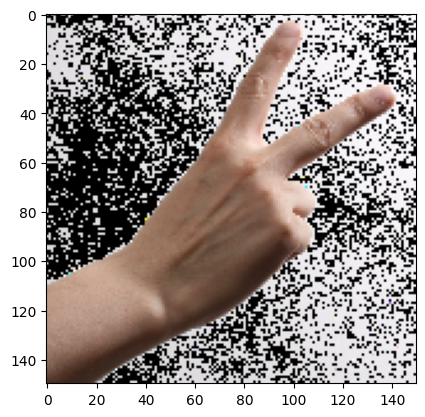

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lokasi file gambar
file_path = '/content/TEST GUNTING.jpg'

# Memprediksi gambar
img = image.load_img(file_path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

# Menampilkan hasil prediksi
print(file_path)
if np.argmax(classes)==0:
   print('gunting')
elif np.argmax(classes)==1:
   print('batu')
else:
   print('kertas')

1/1 [==============================] - 0s 66ms/step
/content/TEST KERTAS.jpg
gunting


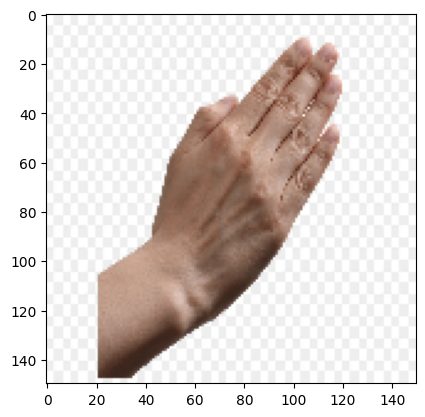

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lokasi file gambar
file_path = '/content/TEST KERTAS.jpg'

# Memprediksi gambar
img = image.load_img(file_path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

# Menampilkan hasil prediksi
print(file_path)
if np.argmax(classes)==0:
   print('gunting')
elif np.argmax(classes)==1:
   print('batu')
else:
   print('kertas')
